In [1]:
import pandas as pd
import yaml
root_path = '/local/work/merengelke/aipal/'
config = yaml.load(open('cfg.yaml', 'r'), Loader=yaml.FullLoader)

cities_countries = config['cities_countries']
paths = [f"{root_path}{city_country}/aipal/predict.csv" for city_country in cities_countries]

df = pd.DataFrame()
for path in paths:
    df_small = pd.read_csv(path)
    df_small['city_country'] = path.split('/')[-3]
    df = pd.concat([df, df_small])
    
# age over 18
if config['is_adult']:
    df = df[df['age'] > 18]
else:
    df = df[df['age'] <= 18]
df.drop(columns=['ELN', 'Diagnosis', 'additional.diagnosis.details..lineage.etc', 'lineage.details'], inplace=True)

In [2]:
df

,ID,age,class,MCV_fL,PT_percent,LDH_UI_L,MCHC_g_L,WBC_G_L,Fibrinogen_g_L,Monocytes_G_L,Platelets_G_L,Lymphocytes_G_L,sex,Monocytes_percent,prediction.ALL,prediction.AML,prediction.APL,city_country,UPN
1,MHH2,24.00000,AML,85.0,56.00000,183.0,32.0,18.20,436.0,1.27,311.0,2.55,Female,6.978022,0.374188,0.585135,0.040678,bochum,NaN
2,MHH3,30.00000,ALL,83.0,70.00000,2018.0,33.0,59.00,NaN,0.00,51.0,2.95,Male,0.000000,0.600515,0.375619,0.023866,bochum,NaN
3,MHH4,40.00000,AML,108.0,116.00000,173.0,35.0,1.00,425.0,0.03,76.0,0.93,Female,3.000000,0.171153,0.817505,0.011342,bochum,NaN
4,MHH5,49.00000,AML,91.0,62.70000,188.0,37.0,9.90,700.0,5.77,25.0,1.88,Male,58.282828,0.021195,0.959750,0.019054,bochum,NaN
5,MHH6,46.00000,AML,81.0,62.40000,1173.0,33.0,42.00,700.0,1.26,86.0,0.42,Female,3.000000,0.594299,0.347099,0.058601,bochum,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,ICH-162,64.67077,AML,96.7,68.75000,726.0,32.8,66.25,646.0,NaN,23.0,NaN,Male,NaN,0.272298,0.613121,0.114581,milano,NaN
131,ICH-164,79.34839,AML,90.8,70.51282,302.0,33.5,53.72,511.0,16.50,110.0,34.20,Female,30.714818,0.026821,0.968902,0.004277,milano,NaN
132,ICH-166,72.00274,AML,107.4,82.70677,106.0,35.1,2.08,243.0,0.10,2.0,1.30,Male,4.807692,0.066396,0.926456,0.007148,milano,NaN
133,ICH-168,81.01574,AML,106.6,76.92308,133.0,33.5,2.03,550.0,0.20,52.0,1.70,Male,9.852217,0.039871,0.955119,0.005009,milano,NaN


In [3]:
# idmax on 
prediction_columns = ['prediction.ALL', 'prediction.AML', 'prediction.APL']
df['prediction.ALL'].idxmax()

df["predicted_class"] = (
    df[prediction_columns]
    .idxmax(axis=1)
    .str.replace("prediction.", "", regex=False)
)

In [4]:
# only take rows where class != predicted_class
df_false = df[df["class"] != df["predicted_class"]]
df_true = df[df["class"] == df["predicted_class"]]

Text(0.5, 1.0, 'True Positives')

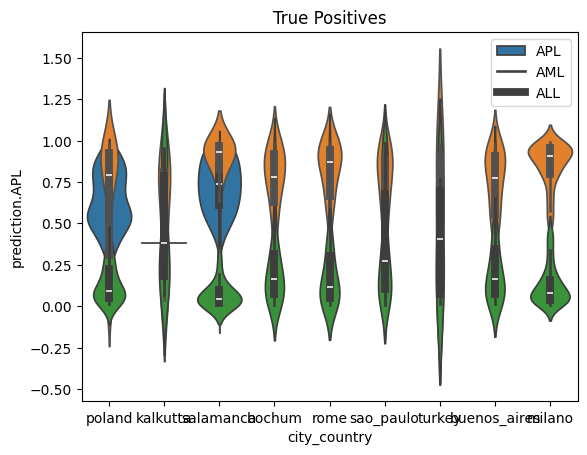

In [5]:
# vilon plot for true positives by city_country
import seaborn as sns
import matplotlib.pyplot as plt

# APL 
apl_true = df_true[df_true['class'] == 'APL']
sns.violinplot(x='city_country', y='prediction.APL', data=apl_true)

amp_true = df_true[df_true['class'] == 'AML']
sns.violinplot(x='city_country', y='prediction.AML', data=df_true)

all_true = df_true[df_true['class'] == 'ALL']
sns.violinplot(x='city_country', y='prediction.ALL', data=df_true)

plt.legend(['APL', 'AML', 'ALL'])
plt.title('True Positives')

Text(0.5, 1.0, 'False Positives')

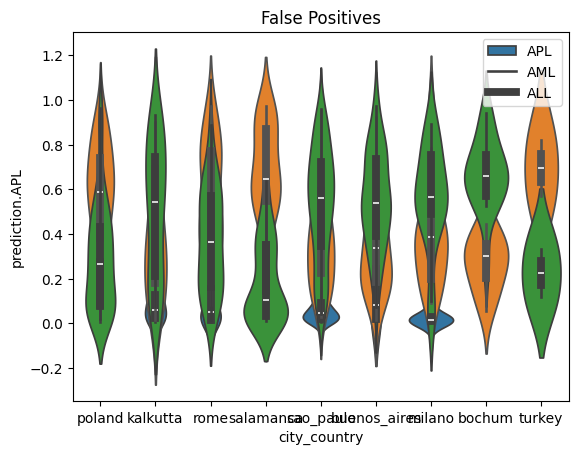

In [6]:
# df flase
apl_false = df_false[df_false['class'] == 'APL']
sns.violinplot(x='city_country', y='prediction.APL', data=apl_false)

amp_false = df_false[df_false['class'] == 'AML']
sns.violinplot(x='city_country', y='prediction.AML', data=df_false)

all_false = df_false[df_false['class'] == 'ALL']
sns.violinplot(x='city_country', y='prediction.ALL', data=df_false)

plt.legend(['APL', 'AML', 'ALL'])
plt.title('False Positives')
